In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt

In [2]:
# Reading the input files
df = pd.read_csv("../../../../Data/Sequence CSVs/DENV1_DF.csv", header=None)
dss = pd.read_csv("../../../../Data/Sequence CSVs/DENV1_DSS.csv", header=None)
dhf = pd.read_csv("../../../../Data/Sequence CSVs/DENV1_DHF.csv", header=None)

# Printing the shape of the data
print("The shape of DF data is:", str(df.shape))
print("The shape of DSS data is:", str(dss.shape))
print("The shape of DHF data is:", str(dhf.shape))

The shape of DF data is: (584, 1)
The shape of DSS data is: (42, 1)
The shape of DHF data is: (352, 1)


In [3]:
# Making the disease label column
df_disease = np.repeat(0, 584)
dss_disease = np.repeat(1, 42)
dhf_disease = np.repeat(1, 352)

# Attaching the "Disease" labeled column to the input
df["Disease"] = df_disease
dss["Disease"] = dss_disease
dhf["Disease"] = dhf_disease

# Renaming the columns
df = df.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dss = dss.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})
dhf = dhf.rename(index=str, columns={0: "Sequence", "Disease": "Disease"})

# Concatinating the input data into one DataFrame and shuffling it
result = pd.concat([df, dss, dhf], axis = 0, sort = False)
result = result.sample(frac = 1)
print("The combined shape of the given data is:", str(result.shape))

# Taking a peek at the combined data
print(result.head())

The combined shape of the given data is: (978, 2)
                                              Sequence  Disease
539  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0
2    atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        1
172  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        1
40   atgaacaaccaacgaaaaaagacggctcgaccgtctttcaatatgc...        1
540  atgaacaaccaacggaaaaagacggctcgaccgtctttcaatatgc...        0


In [4]:
# function to convert sequence strings into k-mer words, default size = 7
def getKmers(sequence, size = 7):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

result['words'] = result.apply(lambda x: getKmers(x['Sequence']), axis=1)
result = result.drop('Sequence', axis=1)

result_texts = list(result['words'])
for item in range(len(result_texts)):
    result_texts[item] = ' '.join(result_texts[item])

The shape of y is: (978,)


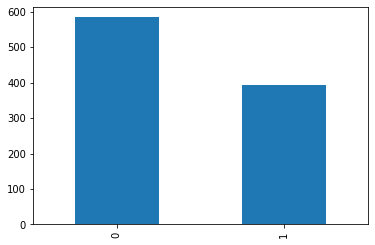

In [5]:
# Creating y and printing the shape of it
y = result.iloc[:, 0].values
print("The shape of y is:", y.shape)

# Checking the balance of the disease severity
result["Disease"].value_counts().sort_index().plot.bar()

In [6]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(result_texts)

# Print the shape of x
print("The shape of x matrix is:", x.shape)

The shape of x matrix is: (978, 66006)


## Nested Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of C for Logistic Regression
C_list = [0.1, 0.5, 1.0, 10, 100]
# empty list to store scores
C_scores = []

In [8]:
from sklearn.linear_model import LogisticRegression
# 1. we will loop through reasonable values of k
for c in C_list:
    # 2. run LogisticRegression with C = c
    lr = LogisticRegression(random_state = 0, C = c)
    # 3. obtain cross_val_score for LogisticRegression with C = c
    scores = cross_val_score(lr, x, y, cv = 10, scoring='accuracy')
    # 4. append mean of scores for C = c to C_scores list
    C_scores.append(scores.mean())
    
    print("The score for C  =", c, "is:", scores.mean())

/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.1 is: 0.6192023326043944


/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 0.5 is: 0.6141726543788399


/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 1.0 is: 0.6111631781734873


/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 10 is: 0.6081328751431844


/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for C  = 100 is: 0.6081745287930854


Length of list 5
Max of list 0.6192023326043944


Text(0, 0.5, 'Cross-validated accuracy')

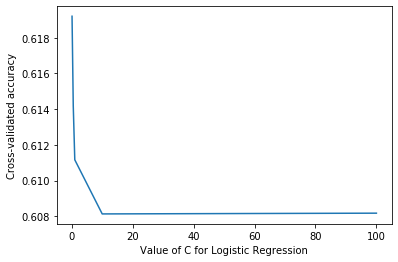

In [9]:
# in essence, this is basically running the k-fold cross-validation method 30 times.
# we should have 21 scores here
print('Length of list', len(C_scores))
print('Max of list', max(C_scores))

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(C_list, C_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-validated accuracy')